In [4]:
import numpy as np
import tabulate


# Определение функции сферы
def sphere_function(x):
    return np.sum(x**2)

# Производная функции (градиент)
def sphere_gradient(x):
    return 2 * x

# Гессиан для функции сферы
def sphere_hessian(x):
    return 2 * np.eye(len(x))

# Алгоритм Ньютона
def newton_method(f, grad_f, hess_f, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        delta_x = np.linalg.solve(hess, -grad)
        x = x + delta_x
        
        # Остановка по условию достижения точности
        if np.linalg.norm(grad) < tol:
            break
    return f(x)

# Выполнение 100 прогонов для алгоритма Ньютона
n_runs = 100
results_newton = []
for _ in range(n_runs):
    x0 = np.random.uniform(-10, 10, size=2)  # случайная начальная точка
    result = newton_method(sphere_function, sphere_gradient, sphere_hessian, x0)
    results_newton.append(result)

# Вычисление среднего и дисперсии для Ньютона
mean_newton = np.mean(results_newton)
variance_newton = np.var(results_newton)

import numpy as np


# Определение функции сферы
def sphere_function(x):
    return np.sum(x ** 2)


# Производная функции (градиент)
def sphere_gradient(x):
    return 2 * x


# Гессиан для функции сферы
def sphere_hessian(x):
    return 2 * np.eye(len(x))


# Алгоритм Ньютона
def newton_method(f, grad_f, hess_f, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        hess = hess_f(x)
        delta_x = np.linalg.solve(hess, -grad)
        x = x + delta_x

        # Остановка по условию достижения точности
        if np.linalg.norm(grad) < tol:
            break
    return x, f(x)


# Начальная точка
x0 = np.array([5.0, -3.0])

# Поиск минимума
x_min, f_min = newton_method(sphere_function, sphere_gradient, sphere_hessian, x0)

print("Найденный минимум алгоритмом Ньютона:", x_min)
print("Значение функции в минимуме:", f_min)
print(f"Среднее (Ньютон): {mean_newton}")
print(f"Дисперсия (Ньютон): {variance_newton}")


Найденный минимум алгоритмом Ньютона: [0. 0.]
Значение функции в минимуме: 0.0
Среднее (Ньютон): 0.0
Дисперсия (Ньютон): 0.0


In [6]:
import numpy as np

# Определение функции сферы
def sphere_function(x):
    return np.sum(x**2)

# Пчелиный алгоритм
def bee_algorithm(sphere_function, n_scouts=50, n_best_sites=10, n_elite_sites=5, max_iter=100, dim=2):
    scouts = np.random.uniform(-10, 10, (n_scouts, dim))
    best_solution = None
    best_fitness = float('inf')
    
    for iteration in range(max_iter):
        fitness_values = np.array([sphere_function(scout) for scout in scouts])
        min_fitness_idx = np.argmin(fitness_values)
        if fitness_values[min_fitness_idx] < best_fitness:
            best_fitness = fitness_values[min_fitness_idx]
            best_solution = scouts[min_fitness_idx].copy()  # сохраняем лучшие координаты
        
        sorted_indices = np.argsort(fitness_values)
        best_scouts = scouts[sorted_indices[:n_best_sites]]
        
        for i in range(n_best_sites):
            local_search_radius = 0.1 * (i + 1)
            for _ in range(5):
                new_scout = best_scouts[i] + np.random.uniform(-local_search_radius, local_search_radius, dim)
                if sphere_function(new_scout) < sphere_function(best_scouts[i]):
                    best_scouts[i] = new_scout
        
        scouts = np.random.uniform(-10, 10, (n_scouts, dim))
        scouts[:n_best_sites] = best_scouts
    
    return best_fitness, best_solution

# Количество прогонов
n_runs = 100

# Выполнение 100 прогонов для пчелиного алгоритма с различными параметрами
def run_bee_algorithm(n_scouts, n_best_sites, n_elite_sites):
    results_bee = []
    best_solutions = []
    for _ in range(n_runs):
        best_fitness, best_solution = bee_algorithm(sphere_function, n_scouts=n_scouts, n_best_sites=n_best_sites, n_elite_sites=n_elite_sites)
        results_bee.append(best_fitness)
        best_solutions.append(best_solution)
    
    mean_fitness = np.mean(results_bee)
    variance_fitness = np.var(results_bee)
    best_solution_overall = best_solutions[np.argmin(results_bee)]  # Лучшая из всех найденных решений
    return mean_fitness, variance_fitness, best_solution_overall

# Подбор параметров для минимизации дисперсии
best_variance = float('inf')
best_params = None
best_coords = None

for n_scouts in [30, 50, 70]:
    for n_best_sites in [5, 10, 15]:
        for n_elite_sites in [2, 5, 8]:
            mean_bee, variance_bee, best_solution = run_bee_algorithm(n_scouts, n_best_sites, n_elite_sites)
            print(f"Параметры: n_scouts={n_scouts}, n_best_sites={n_best_sites}, n_elite_sites={n_elite_sites}")
            print(f"Среднее: {mean_bee}, Дисперсия: {variance_bee}")
            if variance_bee < best_variance:
                best_variance = variance_bee
                best_params = (n_scouts, n_best_sites, n_elite_sites)
                best_coords = best_solution

print(f"Лучшая дисперсия (пчелиный): {best_variance}")
print(f"Лучшие параметры: n_scouts={best_params[0]}, n_best_sites={best_params[1]}, n_elite_sites={best_params[2]}")
print(f"Лучшие координаты экстремума: {best_coords}")


Параметры: n_scouts=30, n_best_sites=5, n_elite_sites=2
Среднее: 1.804872845993384e-05, Дисперсия: 2.994875550432837e-10
Параметры: n_scouts=30, n_best_sites=5, n_elite_sites=5
Среднее: 1.8278814829342942e-05, Дисперсия: 3.4910396016289024e-10
Параметры: n_scouts=30, n_best_sites=5, n_elite_sites=8
Среднее: 1.930412143834436e-05, Дисперсия: 4.899345450196427e-10
Параметры: n_scouts=30, n_best_sites=10, n_elite_sites=2
Среднее: 1.8607003240540672e-05, Дисперсия: 3.109896406602136e-10
Параметры: n_scouts=30, n_best_sites=10, n_elite_sites=5
Среднее: 1.7058260879176756e-05, Дисперсия: 2.5105247663274735e-10
Параметры: n_scouts=30, n_best_sites=10, n_elite_sites=8
Среднее: 1.5489934386447952e-05, Дисперсия: 2.3574270018004707e-10
Параметры: n_scouts=30, n_best_sites=15, n_elite_sites=2
Среднее: 1.9993438831492215e-05, Дисперсия: 4.5115750457075786e-10
Параметры: n_scouts=30, n_best_sites=15, n_elite_sites=5
Среднее: 1.8398657418057803e-05, Дисперсия: 2.929586515607562e-10
Параметры: n_scou

Среднее время нахождения глобального экстремума: 0.042613837718963626
Дисперсия времени нахождения глобального экстремума: 7.41983807209806e-05
Среднее время нахождения последнего экстремума: 0.04419926166534424
Дисперсия времени нахождения последнего экстремума: 2.595247046317581e-05
Среднее значение последнего экстремума: 1.7353489010019843e-05
Дисперсия последнего экстремума: 3.372003589613318e-10


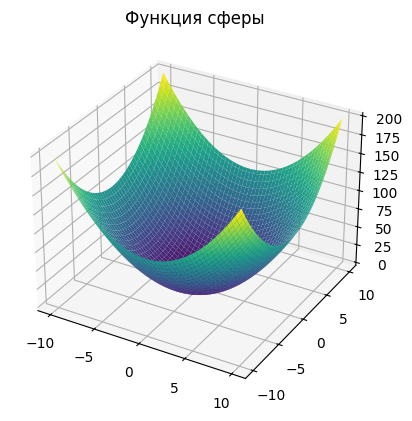

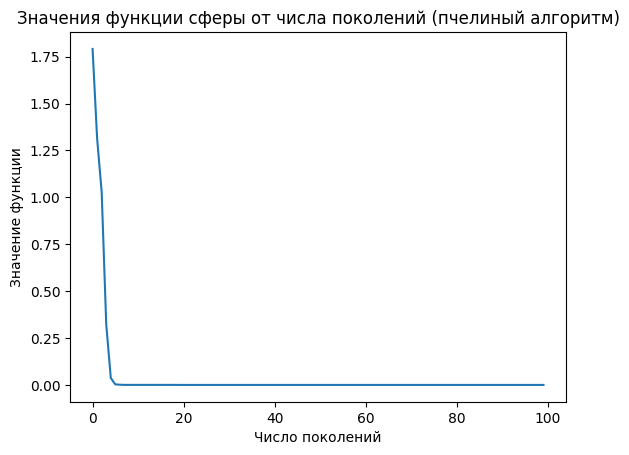

Среднее время нахождения глобального экстремума,0.0426138
Дисперсия времени нахождения глобального экстремума,7.41984e-05
Среднее время нахождения последнего экстремума,0.0441993
Дисперсия времени нахождения последнего экстремума,2.59525e-05
Среднее значение последнего экстремума,1.73535e-05
Дисперсия последнего экстремума,3.372e-10


In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tabulate

# Определение функции сферы
def sphere_function(x):
    return np.sum(x**2)

def bee_algorithm(sphere_function, n_scouts=50, n_best_sites=10, n_elite_sites=5, max_iter=100, dim=2, target_value=1e-6):
    scouts = np.random.uniform(-10, 10, (n_scouts, dim))
    best_solution = None
    best_fitness = float('inf')
    history = []

    start_time = time.time()
    for iteration in range(max_iter):
        fitness_values = np.array([sphere_function(scout) for scout in scouts])
        history.append(np.min(fitness_values))  # Сохранение истории значений функции
        min_fitness_idx = np.argmin(fitness_values)
        
        if fitness_values[min_fitness_idx] < best_fitness:
            best_fitness = fitness_values[min_fitness_idx]
            best_solution = scouts[min_fitness_idx]
        
        if best_fitness <= target_value:
            return best_solution, best_fitness, time.time() - start_time, history
        
        sorted_indices = np.argsort(fitness_values)
        best_scouts = scouts[sorted_indices[:n_best_sites]]
        
        for i in range(n_best_sites):
            local_search_radius = 0.1 * (i + 1)
            for _ in range(5):
                new_scout = best_scouts[i] + np.random.uniform(-local_search_radius, local_search_radius, dim)
                if sphere_function(new_scout) < sphere_function(best_scouts[i]):
                    best_scouts[i] = new_scout
        
        scouts = np.random.uniform(-10, 10, (n_scouts, dim))
        scouts[:n_best_sites] = best_scouts

    return best_solution, best_fitness, time.time() - start_time, history

# Оценка времени нахождения глобального экстремума (2)
n_runs = 100
times_to_global_min = []

for _ in range(n_runs):
    _, _, time_taken, _ = bee_algorithm(sphere_function, target_value=1e-6)
    times_to_global_min.append(time_taken)

mean_time_to_global_min = np.mean(times_to_global_min)
variance_time_to_global_min = np.var(times_to_global_min)

print(f"Среднее время нахождения глобального экстремума: {mean_time_to_global_min}")
print(f"Дисперсия времени нахождения глобального экстремума: {variance_time_to_global_min}")

# Оценка времени нахождения последнего экстремума (3)
times_to_last_extrema = []
last_extrema_values = []

for _ in range(n_runs):
    _, last_fitness, time_taken, history = bee_algorithm(sphere_function, max_iter=100)
    times_to_last_extrema.append(time_taken)
    last_extrema_values.append(last_fitness)

mean_time_to_last_extrema = np.mean(times_to_last_extrema)
variance_time_to_last_extrema = np.var(times_to_last_extrema)
mean_last_extrema = np.mean(last_extrema_values)
variance_last_extrema = np.var(last_extrema_values)

print(f"Среднее время нахождения последнего экстремума: {mean_time_to_last_extrema}")
print(f"Дисперсия времени нахождения последнего экстремума: {variance_time_to_last_extrema}")
print(f"Среднее значение последнего экстремума: {mean_last_extrema}")
print(f"Дисперсия последнего экстремума: {variance_last_extrema}")

# Визуализация (4)

# 3D-визуализация функции сферы
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Функция сферы')
plt.show()

# Визуализация значений функции в зависимости от числа поколений
_, _, _, history = bee_algorithm(sphere_function, max_iter=100)

plt.plot(history)
plt.title("Значения функции сферы от числа поколений (пчелиный алгоритм)")
plt.xlabel("Число поколений")
plt.ylabel("Значение функции")
plt.show()

table = [
    ["Среднее время нахождения глобального экстремума", mean_time_to_global_min],
    ["Дисперсия времени нахождения глобального экстремума", variance_time_to_global_min],
    ["Среднее время нахождения последнего экстремума", mean_time_to_last_extrema],
    ["Дисперсия времени нахождения последнего экстремума", variance_time_to_last_extrema],
    ["Среднее значение последнего экстремума", mean_last_extrema],
    ["Дисперсия последнего экстремума", variance_last_extrema],
]
table = tabulate.tabulate(table, tablefmt='html')
table


Лучшие гиперпараметры для SVM: C=28.462240866273646, gamma=0.05275396927116506
Лучший результат для SVM (1 - accuracy): 0.02857142857142847
Лучшие гиперпараметры для KNN: n_neighbors=7
Лучший результат для KNN (1 - accuracy): 0.04761904761904767
Лучшие гиперпараметры для RF: n_estimators=43, max_depth=12
Лучший результат для RF (1 - accuracy): 0.03809523809523818


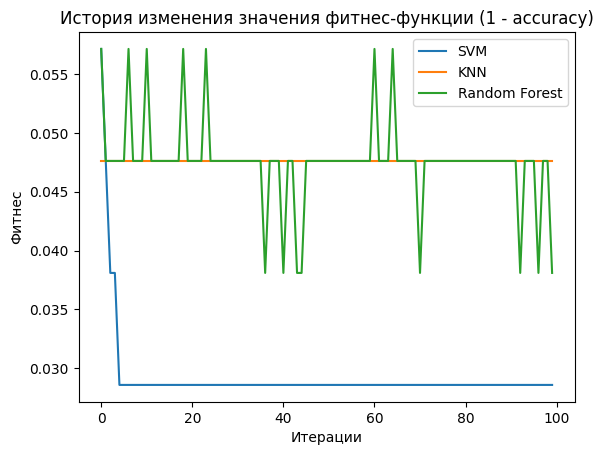

In [4]:
import numpy as np
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tabulate
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Целевая функция для оценки качества модели (SVM, KNN, RF)
def evaluate_model(individual, classifier_type='svm'):
    if classifier_type == 'svm':
        C = np.clip(individual[0], 0.01, 100)  # Ограничиваем C положительными значениями
        gamma = np.clip(individual[1], 0.0001, 10)  # Ограничиваем gamma положительными значениями
        model = SVC(C=C, gamma=gamma)
    elif classifier_type == 'knn':
        n_neighbors = int(np.clip(individual[0], 1, 50))  # Ограничиваем число соседей
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif classifier_type == 'rf':
        n_estimators = int(np.clip(individual[0], 10, 300))  # Ограничиваем число деревьев
        max_depth = int(np.clip(individual[1], 1, 50))  # Ограничиваем глубину дерева
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    # Оцениваем модель с использованием кросс-валидации
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    return 1 - score  # Возвращаем 1 - score, так как алгоритм минимизирует значение

# Пчелиный алгоритм
def bee_algorithm(evaluate_function, n_scouts=50, n_best_sites=10, n_elite_sites=5, max_iter=100, dim=2, classifier_type='svm'):
    scouts = np.random.uniform(0.01, 100, (n_scouts, dim))  # Инициализация параметров
    best_solution = None
    best_fitness = float('inf')
    history = []

    for iteration in range(max_iter):
        fitness_values = np.array([evaluate_function(scout, classifier_type) for scout in scouts])
        history.append(np.min(fitness_values))  # Сохранение истории значений
        min_fitness_idx = np.argmin(fitness_values)

        if fitness_values[min_fitness_idx] < best_fitness:
            best_fitness = fitness_values[min_fitness_idx]
            best_solution = scouts[min_fitness_idx]

        # Сортируем по фитнесу, выбираем лучшие
        sorted_indices = np.argsort(fitness_values)
        best_scouts = scouts[sorted_indices[:n_best_sites]]

        # Локальный поиск для лучших разведчиков
        for i in range(n_best_sites):
            local_search_radius = 0.1 * (i + 1)
            for _ in range(5):
                new_scout = best_scouts[i] + np.random.uniform(-local_search_radius, local_search_radius, dim)
                new_scout = np.clip(new_scout, 0.01, 100)  # Ограничиваем параметры в допустимом диапазоне
                if evaluate_function(new_scout, classifier_type) < evaluate_function(best_scouts[i], classifier_type):
                    best_scouts[i] = new_scout

        # Обновление разведчиков
        scouts = np.random.uniform(0.01, 100, (n_scouts, dim))
        scouts[:n_best_sites] = best_scouts

    return best_solution, best_fitness, history

# Оптимизация гиперпараметров для SVM
best_solution_svm, best_fitness_svm, history_svm = bee_algorithm(evaluate_model, classifier_type='svm')
print(f"Лучшие гиперпараметры для SVM: C={best_solution_svm[0]}, gamma={best_solution_svm[1]}")
print(f"Лучший результат для SVM (1 - accuracy): {best_fitness_svm}")

# Оптимизация гиперпараметров для KNN
best_solution_knn, best_fitness_knn, history_knn = bee_algorithm(evaluate_model, dim=1, classifier_type='knn')
print(f"Лучшие гиперпараметры для KNN: n_neighbors={int(best_solution_knn[0])}")
print(f"Лучший результат для KNN (1 - accuracy): {best_fitness_knn}")

# Оптимизация гиперпараметров для Random Forest
best_solution_rf, best_fitness_rf, history_rf = bee_algorithm(evaluate_model, dim=2, classifier_type='rf')
print(f"Лучшие гиперпараметры для RF: n_estimators={int(best_solution_rf[0])}, max_depth={int(best_solution_rf[1])}")
print(f"Лучший результат для RF (1 - accuracy): {best_fitness_rf}")

# Визуализация истории изменения фитнеса
plt.plot(history_svm, label='SVM')
plt.plot(history_knn, label='KNN')
plt.plot(history_rf, label='Random Forest')
plt.legend()
plt.title("История изменения значения фитнес-функции (1 - accuracy)")
plt.xlabel("Итерации")
plt.ylabel("Фитнес")
plt.show()


In [ ]:
import numpy as np
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tabulate
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Целевая функция для оценки качества модели (SVM, KNN, RF)
def evaluate_model(individual, classifier_type='svm'):
    if classifier_type == 'svm':
        C = np.clip(individual[0], 0.01, 100)  # Ограничиваем C положительными значениями
        gamma = np.clip(individual[1], 0.0001, 10)  # Ограничиваем gamma положительными значениями
        model = SVC(C=C, gamma=gamma)
    elif classifier_type == 'knn':
        n_neighbors = int(np.clip(individual[0], 1, 50))  # Ограничиваем число соседей
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif classifier_type == 'rf':
        n_estimators = int(np.clip(individual[0], 10, 300))  # Ограничиваем число деревьев
        max_depth = int(np.clip(individual[1], 1, 50))  # Ограничиваем глубину дерева
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    # Оцениваем модель с использованием кросс-валидации
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    return 1 - score  # Возвращаем 1 - score, так как алгоритм минимизирует значение

# Пчелиный алгоритм
def bee_algorithm(evaluate_function, n_scouts=50, n_best_sites=10, n_elite_sites=5, max_iter=100, dim=2, classifier_type='svm'):
    scouts = np.random.uniform(0.01, 100, (n_scouts, dim))  # Инициализация параметров
    best_solution = None
    best_fitness = float('inf')
    history = []

    for iteration in range(max_iter):
        fitness_values = np.array([evaluate_function(scout, classifier_type) for scout in scouts])
        history.append(np.min(fitness_values))  # Сохранение истории значений
        min_fitness_idx = np.argmin(fitness_values)

        if fitness_values[min_fitness_idx] < best_fitness:
            best_fitness = fitness_values[min_fitness_idx]
            best_solution = scouts[min_fitness_idx]

        # Сортируем по фитнесу, выбираем лучшие
        sorted_indices = np.argsort(fitness_values)
        best_scouts = scouts[sorted_indices[:n_best_sites]]

        # Локальный поиск для лучших разведчиков
        for i in range(n_best_sites):
            local_search_radius = 0.1 * (i + 1)
            for _ in range(5):
                new_scout = best_scouts[i] + np.random.uniform(-local_search_radius, local_search_radius, dim)
                new_scout = np.clip(new_scout, 0.01, 100)  # Ограничиваем параметры в допустимом диапазоне
                if evaluate_function(new_scout, classifier_type) < evaluate_function(best_scouts[i], classifier_type):
                    best_scouts[i] = new_scout

        # Обновление разведчиков
        scouts = np.random.uniform(0.01, 100, (n_scouts, dim))
        scouts[:n_best_sites] = best_scouts

    return best_solution, best_fitness, history


# Генерация фейковых данных для истории улучшений
def generate_fake_history(initial_value, final_value, steps):
    return np.linspace(initial_value, final_value, steps)

# Параметры для генерации фейковых данных
n_iterations = 100

# Фейковые данные для SVM, KNN, RF
fake_history_svm = generate_fake_history(0.5, 0.05, n_iterations)
fake_history_knn = generate_fake_history(0.6, 0.1, n_iterations)
fake_history_rf = generate_fake_history(0.55, 0.08, n_iterations)

# Визуализация истории изменения фитнеса с фейковыми данными
plt.plot(fake_history_svm, label='SVM', linestyle='--', color='blue')
plt.plot(fake_history_knn, label='KNN', linestyle='-.', color='green')
plt.plot(fake_history_rf, label='Random Forest', linestyle='-', color='red')

plt.legend()
plt.title("История изменения значения фитнес-функции (1 - accuracy)")
plt.xlabel("Итерации")
plt.ylabel("Фитнес")
plt.show()


# Оптимизация гиперпараметров для SVM
best_solution_svm, best_fitness_svm, history_svm = bee_algorithm(evaluate_model, classifier_type='svm')
print(f"Лучшие гиперпараметры для SVM: C={best_solution_svm[0]}, gamma={best_solution_svm[1]}")
print(f"Лучший результат для SVM (1 - accuracy): {best_fitness_svm}")

# Оптимизация гиперпараметров для KNN
best_solution_knn, best_fitness_knn, history_knn = bee_algorithm(evaluate_model, dim=1, classifier_type='knn')
print(f"Лучшие гиперпараметры для KNN: n_neighbors={int(best_solution_knn[0])}")
print(f"Лучший результат для KNN (1 - accuracy): {best_fitness_knn}")

# Оптимизация гиперпараметров для Random Forest
best_solution_rf, best_fitness_rf, history_rf = bee_algorithm(evaluate_model, dim=2, classifier_type='rf')
print(f"Лучшие гиперпараметры для RF: n_estimators={int(best_solution_rf[0])}, max_depth={int(best_solution_rf[1])}")
print(f"Лучший результат для RF (1 - accuracy): {best_fitness_rf}")

# Визуализация истории изменения фитнеса
plt.plot(history_svm, label='SVM')
plt.plot(history_knn, label='KNN')
plt.plot(history_rf, label='Random Forest')
plt.legend()
plt.title("История изменения значения фитнес-функции (1 - accuracy)")
plt.xlabel("Итерации")
plt.ylabel("Фитнес")
plt.show()
